## Observing the effect of using Momentum
As the fourth factor analyzed on training neural networks, the effect of momentum is observed. From theory it is expected that momentum will help learning in the sense that it allows the model pass the local minimas in gradient space more easily.
### Necessary Imports
The imported and used libraries are identical to the ones for the previous part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ann import *
from dataset_setup import *

### Importing data and the helper functions
This file also follows the same structure with the other parts. Here the dataset is not downloaded again but rather read from the saved files. Also the utility functions that are used in the previous parts are used here. The implementations were explained before.

In [2]:
file_paths = ['data/train1.txt', 
              'data/test1.txt', 
              'data/train2.txt', 
              'data/test2.txt']
dataset_1 = Dataset(file_paths[0], file_paths[1])
dataset_2 = Dataset(file_paths[2], file_paths[3])

In [3]:
def draw_uniform_samples(data, no_of_samples):
    max_values = np.max(data, axis=0)
    min_values = np.min(data, axis=0)
    dist = np.random.uniform(min_values[0], max_values[0], no_of_samples)
    return dist

In [4]:
def plot_losses(losses):
    epoch_count = len(losses)
    plt.plot(range(1, epoch_count + 1), losses)
    plt.title("Loss vs Epoch Count", fontsize=14)
    plt.ylabel("Loss", fontsize=10)
    plt.xlabel("Epoch", fontsize=10)

In [5]:
def plot_predictions(samples, dist_count, model, title, data_label, loc):
    dist = draw_uniform_samples(samples, dist_count)
    dist = np.reshape(dist, (len(dist), 1))
    y_pred = model.predict(dist)
    sort = list(sorted(zip(dist, y_pred)))
    dist, y_pred = zip(*sort)
    plt.title(title, fontsize=14)
    plt.xlabel("x", fontsize=10)
    plt.ylabel("y", fontsize=10)
    plt.scatter(samples[:, 0], samples[:, 1], label=data_label)
    plt.plot(dist, y_pred, label="Learned model", c="red", lw=2.5)
    plt.legend(loc=loc, borderaxespad=1.0)

In [6]:
def plot_predictions(samples, dist_count, model, title, data_label, loc):
    dist = draw_uniform_samples(samples, dist_count)
    dist = np.reshape(dist, (len(dist), 1))
    y_pred = model.predict(dist)
    sort = list(sorted(zip(dist, y_pred)))
    dist, y_pred = zip(*sort)
    plt.title(title, fontsize=14)
    plt.xlabel("x", fontsize=10)
    plt.ylabel("y", fontsize=10)
    plt.scatter(samples[:, 0], samples[:, 1], label=data_label)
    plt.plot(dist, y_pred, label="Learned model", c="red", lw=2.5)
    plt.legend(loc=loc, borderaxespad=1.0)

In [7]:
def get_loss(data, model):
    labels = data[:, 1]
    samples = data[:, 0]
    samples = np.reshape(samples, (len(samples), 1))
    y_pred = model.predict(samples)
    print("Standard Deviation of loss: {:.4f}".format(np.std(model.loss(labels, y_pred, stage="forward"), axis=0)))
    loss = np.sum(model.loss(labels, y_pred, stage="forward"), axis=0) / len(labels)
    return loss

In [8]:
normalized_train_2, normalized_test_2 = dataset_2.normalize_data()

### Optimal Configuration found previously
As a base model, first the model found with optimal hyper-parameters is illustated. This model uses momentum with $\alpha$ value 0.3. In this formulation of momentum, this $\alpha$ parameter is the coefficient for the gradient obtained the latest. As it can be seen, the model converges rather quickly with a preferrable shape for loss values. The loss curve and the learned data distribution is given below.

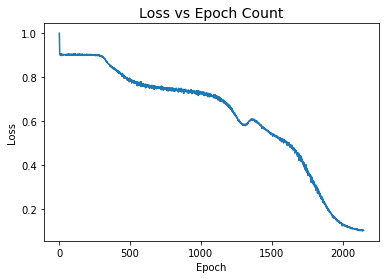

In [12]:
optimum_model = ANN(input_dim=1, weight_range=0.001, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

optimum_losses = optimum_model.fit(normalized_train_2, 8000, learning_rate=0.001, update="sgd", momentum_enabled=True, alpha=0.3, threshold=0.1)

plot_losses(optimum_losses)

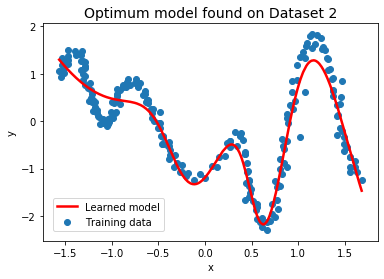

In [13]:
plot_predictions(normalized_train_2, 500, optimum_model, "Optimum model found on Dataset 2", "Training data", "lower left")

In [14]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, optimum_model)))
print("Threshold: 0.1, Epoch Count: {}".format(len(optimum_losses)))

Standard Deviation of loss: 0.1469
Training Loss: 0.1019
Threshold: 0.1, Epoch Count: 2148


### Configuration using Momentum
Repeating the same experiment, the consistency of the model with momentum is also observed. Note that, for each model here a hyper-parameter tuning stage has been performed. The learning took a little bit longer this time but the overall curve is nearly identical. The final local minima is ofund as dependant on the inital weights. It is worth noting that the model tries to overcome one final minima. The loss curve and the learned data distribution is given below.

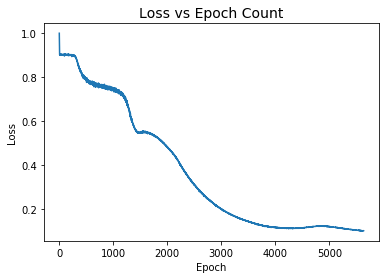

In [18]:
momentum_model = ANN(input_dim=1, weight_range=0.001, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

momentum_losses = momentum_model.fit(normalized_train_2, 8000, learning_rate=0.001, update="sgd", momentum_enabled=True, alpha=0.3, threshold=0.1)

plot_losses(momentum_losses)

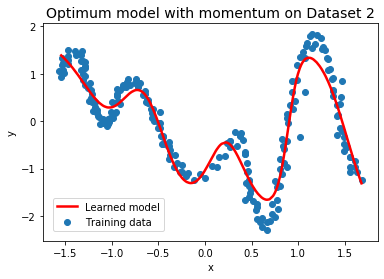

In [19]:
plot_predictions(normalized_train_2, 500, momentum_model, "Optimum model with momentum on Dataset 2", "Training data", "lower left")

In [20]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, momentum_model)))
print("Threshold: 0.1, Epoch Count: {}".format(len(momentum_losses)))

Standard Deviation of loss: 0.1788
Training Loss: 0.0994
Threshold: 0.1, Epoch Count: 5637


### Configuration without Momentum
Following the previous comments on using momentum, when momentum is not used the the mentioned local minima (plateou) model cannot get past the final local minima. This observation can be seen in the learned data distribution if the third local minima for the distributiın value would be inspected. The loss curve and the learned data distribution is given below.

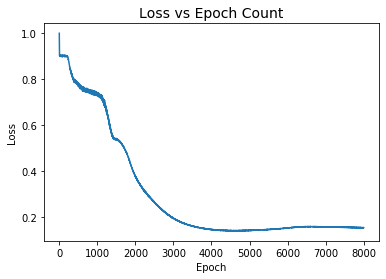

In [21]:
non_momentum_model = ANN(input_dim=1, weight_range=0.003, loss="mse", hidden_layer_enabled=True, hidden_units=8, activation="tanh")

non_momentum_losses = non_momentum_model.fit(normalized_train_2, 8000, learning_rate=0.001, update="sgd", momentum_enabled=False, threshold=0.1)

plot_losses(non_momentum_losses)

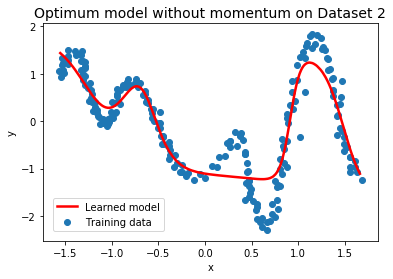

In [22]:
plot_predictions(normalized_train_2, 500, non_momentum_model, "Optimum model without momentum on Dataset 2", "Training data", "lower left")

In [24]:
print("Training Loss: {:.4f}".format(get_loss(normalized_train_2, non_momentum_model)))
print("Threshold: 0.1, Epoch Count: {}".format(len(non_momentum_losses)))

Standard Deviation of loss: 0.2476
Training Loss: 0.1531
Threshold: 0.1, Epoch Count: 8000
